# Import libraries

In [185]:
from dateutil.parser import parse
import itertools
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
plt.rcParams.update({'figure.figsize':(6,4),'figure.dpi':120})

# Loading data

In [2]:
df_org = pd.read_csv('ShopeeData.csv')
df_org.head()

,itemid,shopid,liked_count,cmt_count,discount,shop_location,shop_rating,name,historical_sold,price,rating_star,rating_count,rcount_with_context,status,Date
0,20030969576,18363975,25677,9675,11%,HÃ Ná»™i,4.931227,"Sá»¯a Rá»­a Máº·t CeraVe SA Smoothing, Hydrati...",35701,9.200000e+09,4.906667,9675,5639,normal,3/10/2024
1,19527695224,18363975,20032,6504,40%,HÃ Ná»™i,4.931227,NÆ°á»›c Táº©y Trang L'Oreal Paris 3in1 Micella...,23141,6.600000e+09,4.922202,6504,4034,normal,3/10/2024
2,21407947288,18363975,18760,2611,4%,HÃ Ná»™i,4.931227,NÆ°á»›c Hoa Há»“ng CÃ¢n Báº±ng Da Simple Sooth...,8489,1.150000e+10,4.932976,2611,1441,normal,3/10/2024
3,14185378989,18363975,14582,8600,47%,HÃ Ná»™i,4.931225,NÆ°á»›c Táº©y Trang Simple Micellar Cleansing ...,28022,7.900000e+09,4.922916,8602,5430,normal,3/10/2024
4,10001549800,18363975,29919,19065,22%,HÃ Ná»™i,4.931228,Sá»¯a Rá»­a Máº·t SVR Cho Da Dáº§u Má»¥n - SVR...,69948,1.090000e+10,4.915548,19068,10715,normal,3/10/2024


In [3]:
print('Starting date:', df_org['Date'].min())
print('Ending date:', df_org['Date'].max())

Starting date: 3/10/2024
Ending date: 3/31/2024


# Data Processing

In [4]:
df_org['Date'] = pd.to_datetime(df_org['Date'])
df_sales = df_org.groupby("Date").size().reset_index(name='Sales').set_index(["Date"])
df_sales.head()

,Sales
Date,
2024-03-10,166
2024-03-11,165
2024-03-12,168
2024-03-13,175
2024-03-14,174


In [5]:
df_sales.isnull().sum()

Sales    0
dtype: int64

# Data Visualization 

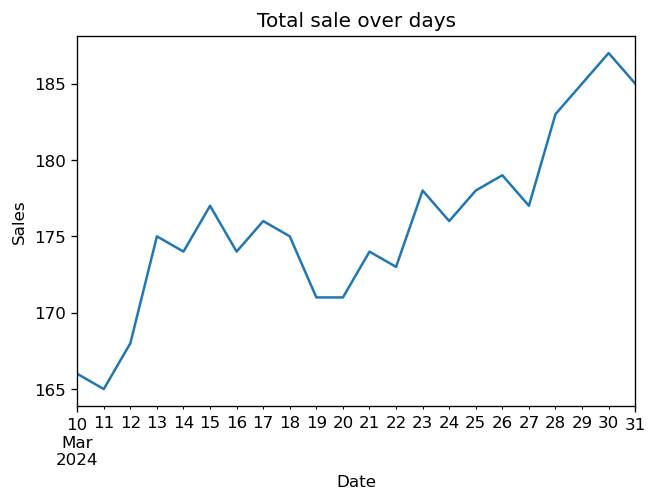

In [6]:
df_sales['Sales'].plot()
plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('Total sale over days')
plt.show()

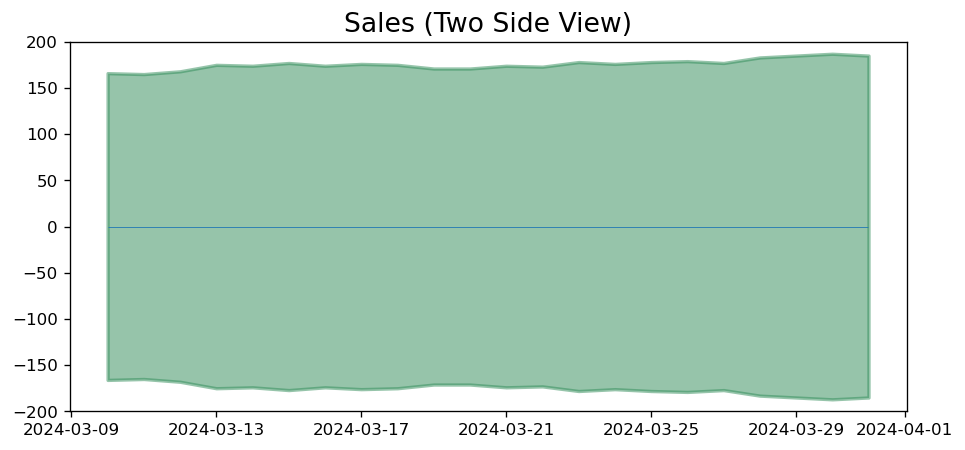

In [7]:
x= df_sales.index
y1= df_sales['Sales'].values

fig, ax = plt.subplots(1, 1, figsize=(9,4), dpi= 120)
plt.fill_between(x, y1=y1, y2=-y1, alpha=0.5, linewidth=2, color='seagreen')
plt.ylim(-200, 200)
plt.title('Sales (Two Side View)', fontsize=16)
plt.hlines(y=0, xmin=np.min(df_sales.index), xmax=np.max(df_sales.index), linewidth=.5)
plt.show()

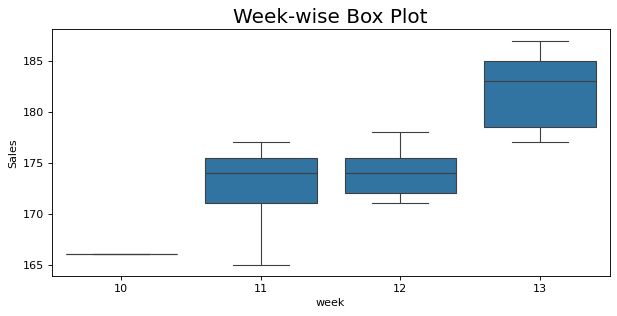

In [8]:
df_sales['week'] = [d.week for d in df_sales.index]
fig, axes = plt.subplots(1, 1, figsize=(9,4), dpi=80)
sns.boxplot(x='week', y='Sales', data=df_sales, ax=axes)
axes.set_title('Week-wise Box Plot', fontsize=18)
df_sales.drop("week", axis=1, inplace=True)
plt.show()

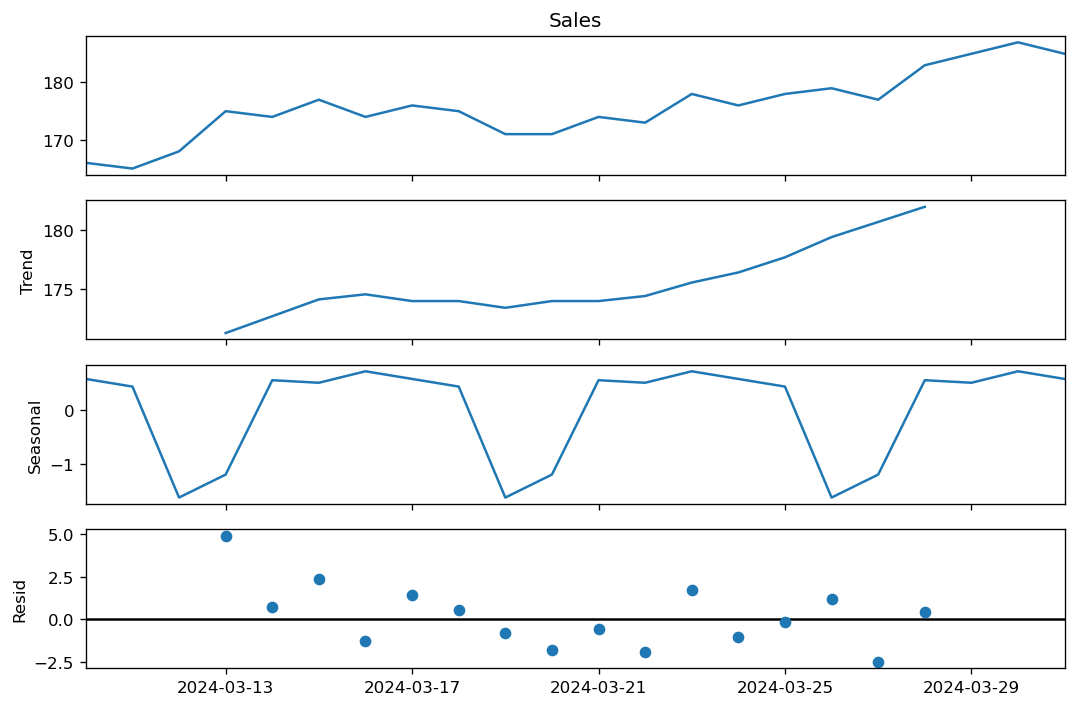

In [61]:
from pylab import rcParams
rcParams['figure.figsize'] = 9, 6

decomposition = sm.tsa.seasonal_decompose(df_sales['Sales'], model='additive')
fig = decomposition.plot()
plt.show()

# Check Stationary

## Rolling mean and standard deviation

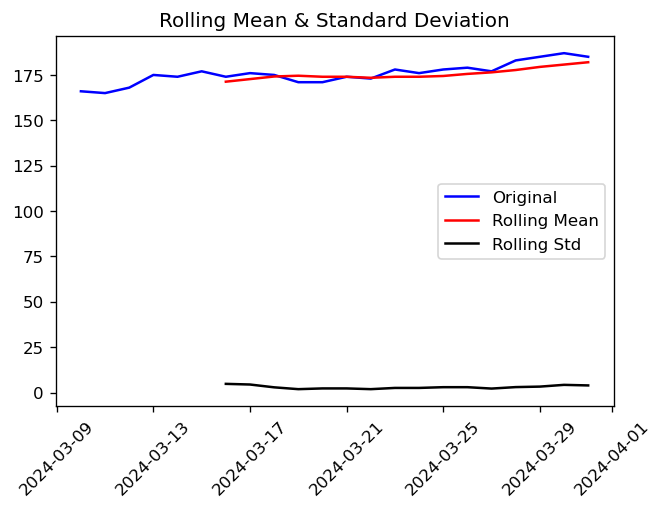

In [9]:
moving_avg = df_sales['Sales'].rolling(7).mean()
moving_std = df_sales['Sales'].rolling(7).std()

plt.plot(df_sales['Sales'], color='blue', label='Original')
plt.plot(moving_avg, color='red', label='Rolling Mean')
plt.plot(moving_std, color='black', label='Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.xticks(rotation=45)
plt.show()

## Dickey-Fuller test

In [10]:
from statsmodels.tsa.stattools import adfuller
print ('Results of Dickey-Fuller Test:')
dftest = adfuller(df_sales["Sales"], autolag='AIC')
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])

for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print(dfoutput)

Results of Dickey-Fuller Test:
Test Statistic                 -1.293163
p-value                         0.632294
#Lags Used                      0.000000
Number of Observations Used    21.000000
Critical Value (1%)            -3.788386
Critical Value (5%)            -3.013098
Critical Value (10%)           -2.646397
dtype: float64


## Combined function

In [11]:
import pandas as pd
from statsmodels.tsa.stattools import adfuller

def check_stationary(sales):
    moving_avg = sales.rolling(window=3).mean()
    moving_std = sales.rolling(window=3).std()

    plt.figure()
    plt.plot(sales, color='blue', label='Original')
    plt.plot(moving_avg, color='red', label='Rolling Mean')
    plt.plot(moving_std, color='black', label='Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.xticks(rotation=45)
    plt.show()

    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(sales, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])

    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

    if dfoutput[1] < 0.05:
        print("The time series is stationary.")
    else:
        print("The time series is non-stationary.")

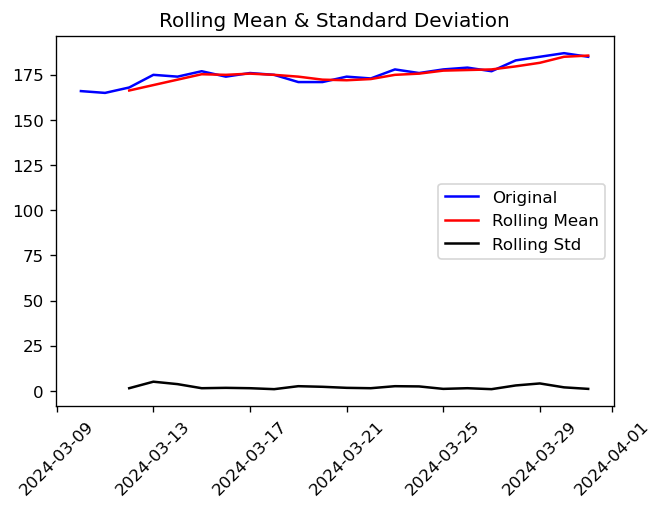

Results of Dickey-Fuller Test:
Test Statistic                 -1.293163
p-value                         0.632294
#Lags Used                      0.000000
Number of Observations Used    21.000000
Critical Value (1%)            -3.788386
Critical Value (5%)            -3.013098
Critical Value (10%)           -2.646397
dtype: float64
The time series is non-stationary.


/var/folders/x1/372sp1hn2fs8wfj7nl_xj3s80000gn/T/ipykernel_57898/2094820251.py:25: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if dfoutput[1] < 0.05:


In [12]:
check_stationary(df_sales["Sales"])

# Make time series stationary
- Take a log transform
- Moving average
- Exponentially weighted moving average
- Difference
- Decomposition

## Log transform

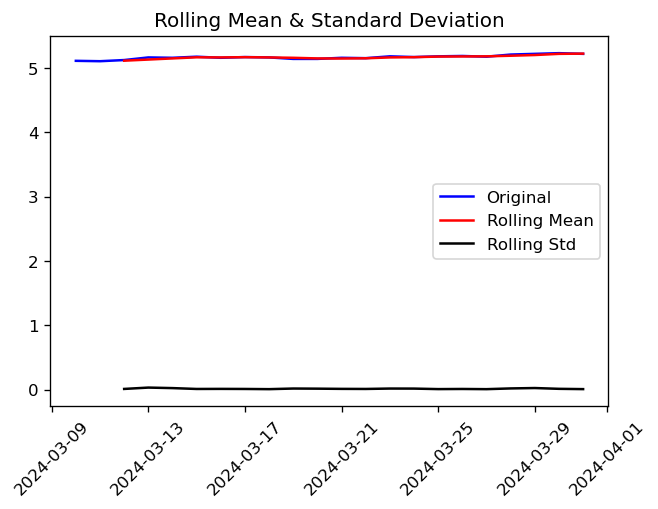

Results of Dickey-Fuller Test:
Test Statistic                 -1.346711
p-value                         0.607540
#Lags Used                      0.000000
Number of Observations Used    21.000000
Critical Value (1%)            -3.788386
Critical Value (5%)            -3.013098
Critical Value (10%)           -2.646397
dtype: float64
The time series is non-stationary.


/var/folders/x1/372sp1hn2fs8wfj7nl_xj3s80000gn/T/ipykernel_57898/2094820251.py:25: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if dfoutput[1] < 0.05:


In [13]:
df_sales_log = np.log(df_sales)
check_stationary(df_sales_log["Sales"])

## Moving Average

(array([19791., 19795., 19799., 19803., 19807., 19811., 19814.]),
 [Text(19791.0, 0, '2024-03-09'),
  Text(19795.0, 0, '2024-03-13'),
  Text(19799.0, 0, '2024-03-17'),
  Text(19803.0, 0, '2024-03-21'),
  Text(19807.0, 0, '2024-03-25'),
  Text(19811.0, 0, '2024-03-29'),
  Text(19814.0, 0, '2024-04-01')])

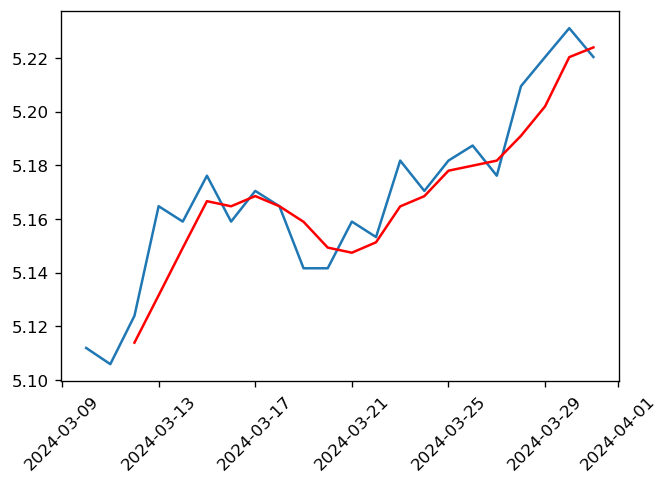

In [14]:
moving_avg = df_sales_log.rolling(3).mean()
plt.plot(df_sales_log)
plt.plot(moving_avg, color='red')
plt.xticks(rotation=45)

In [15]:
df_sales_rollmean = df_sales_log - moving_avg
df_sales_rollmean.head(7)

,Sales
Date,
2024-03-10,NaN
2024-03-11,NaN
2024-03-12,0.009998
2024-03-13,0.033221
2024-03-14,0.009787
2024-03-15,0.009486
2024-03-16,-0.005698


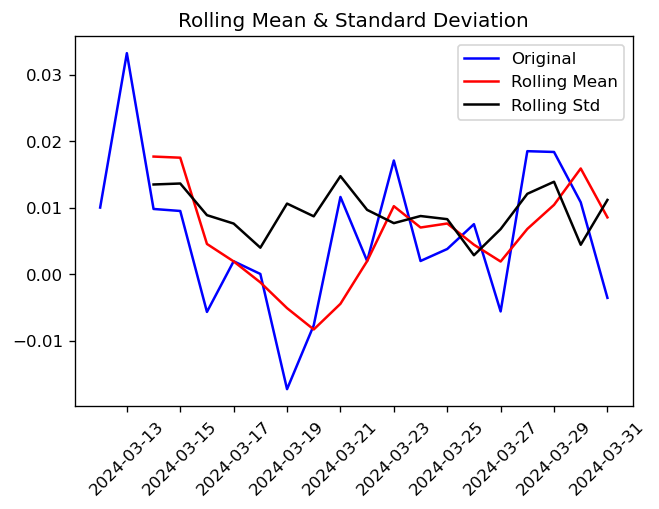

Results of Dickey-Fuller Test:
Test Statistic                 -3.214677
p-value                         0.019151
#Lags Used                      0.000000
Number of Observations Used    19.000000
Critical Value (1%)            -3.832603
Critical Value (5%)            -3.031227
Critical Value (10%)           -2.655520
dtype: float64
The time series is stationary.


/var/folders/x1/372sp1hn2fs8wfj7nl_xj3s80000gn/T/ipykernel_57898/2094820251.py:25: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if dfoutput[1] < 0.05:


In [16]:
df_sales_rollmean.dropna(inplace=True)
check_stationary(df_sales_rollmean["Sales"])

(array([19791., 19795., 19799., 19803., 19807., 19811., 19814.]),
 [Text(19791.0, 0, '2024-03-09'),
  Text(19795.0, 0, '2024-03-13'),
  Text(19799.0, 0, '2024-03-17'),
  Text(19803.0, 0, '2024-03-21'),
  Text(19807.0, 0, '2024-03-25'),
  Text(19811.0, 0, '2024-03-29'),
  Text(19814.0, 0, '2024-04-01')])

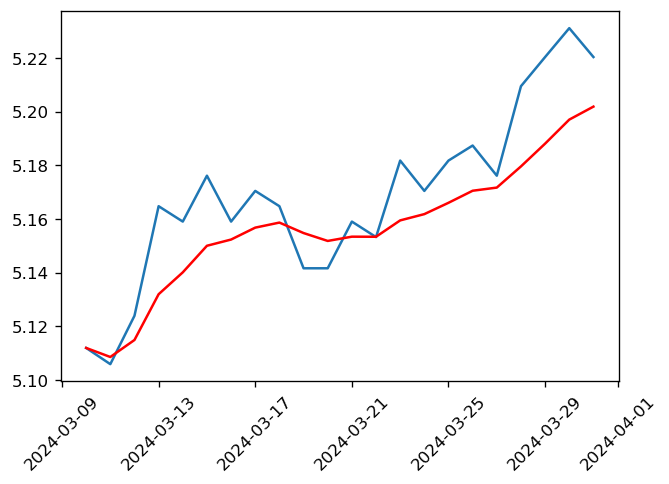

In [17]:
expwighted_avg = df_sales_log.ewm(halflife=3).mean()
plt.plot(df_sales_log)
plt.plot(expwighted_avg, color='red')
plt.xticks(rotation=45)

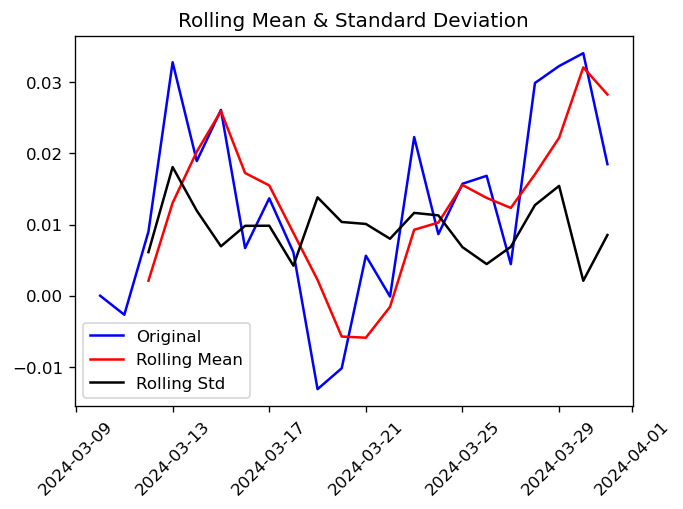

Results of Dickey-Fuller Test:
Test Statistic                 -1.752181
p-value                         0.404447
#Lags Used                      9.000000
Number of Observations Used    12.000000
Critical Value (1%)            -4.137829
Critical Value (5%)            -3.154972
Critical Value (10%)           -2.714477
dtype: float64
The time series is non-stationary.


/var/folders/x1/372sp1hn2fs8wfj7nl_xj3s80000gn/T/ipykernel_57898/2094820251.py:25: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if dfoutput[1] < 0.05:


In [18]:
df_sales_ewm = df_sales_log - expwighted_avg
check_stationary(df_sales_ewm["Sales"])

# Differencing

(array([19795., 19799., 19803., 19807., 19811., 19814.]),
 [Text(19795.0, 0, '2024-03-13'),
  Text(19799.0, 0, '2024-03-17'),
  Text(19803.0, 0, '2024-03-21'),
  Text(19807.0, 0, '2024-03-25'),
  Text(19811.0, 0, '2024-03-29'),
  Text(19814.0, 0, '2024-04-01')])

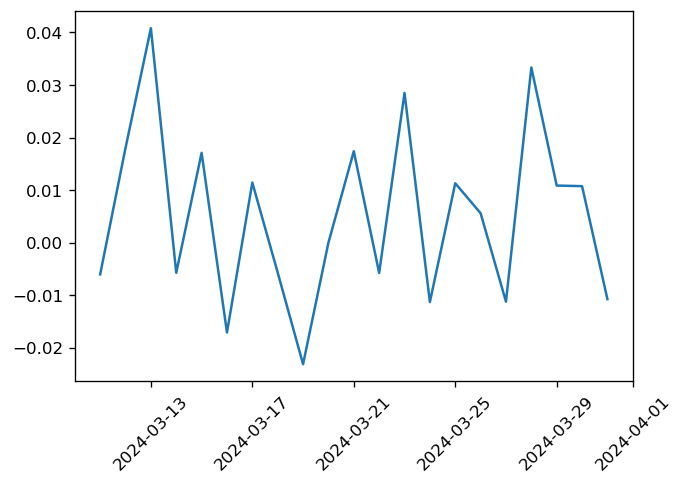

In [19]:
df_sales_diff = df_sales_log - df_sales_log.shift(1)
plt.plot(df_sales_diff)
plt.xticks(rotation=45)

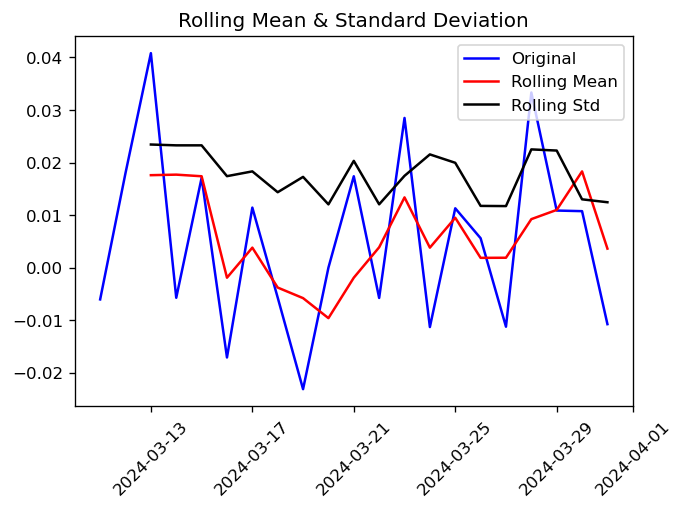

Results of Dickey-Fuller Test:
Test Statistic                 -5.563896
p-value                         0.000002
#Lags Used                      0.000000
Number of Observations Used    20.000000
Critical Value (1%)            -3.809209
Critical Value (5%)            -3.021645
Critical Value (10%)           -2.650713
dtype: float64
The time series is stationary.


/var/folders/x1/372sp1hn2fs8wfj7nl_xj3s80000gn/T/ipykernel_57898/2094820251.py:25: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if dfoutput[1] < 0.05:


In [20]:
df_sales_diff.dropna(inplace=True)
check_stationary(df_sales_diff)

(array([19795., 19797., 19799., 19801., 19803., 19805., 19807., 19809.,
        19811., 19813.]),
 [Text(19795.0, 0, '2024-03-13'),
  Text(19797.0, 0, '2024-03-15'),
  Text(19799.0, 0, '2024-03-17'),
  Text(19801.0, 0, '2024-03-19'),
  Text(19803.0, 0, '2024-03-21'),
  Text(19805.0, 0, '2024-03-23'),
  Text(19807.0, 0, '2024-03-25'),
  Text(19809.0, 0, '2024-03-27'),
  Text(19811.0, 0, '2024-03-29'),
  Text(19813.0, 0, '2024-03-31')])

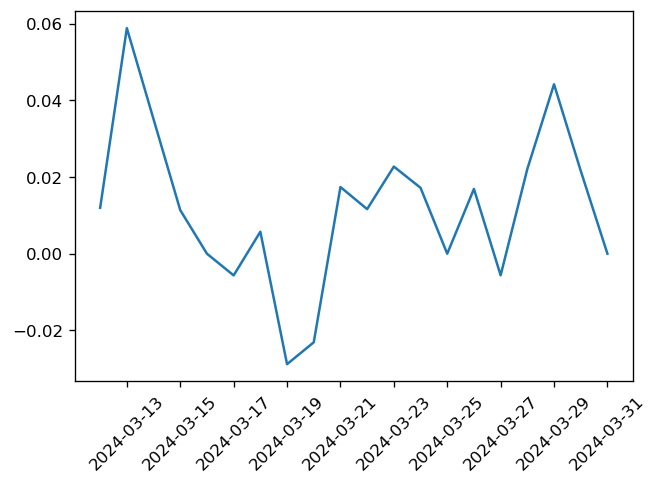

In [21]:
df_sales_diff_2 = df_sales_log - df_sales_log.shift(2)
plt.plot(df_sales_diff_2)
plt.xticks(rotation=45)

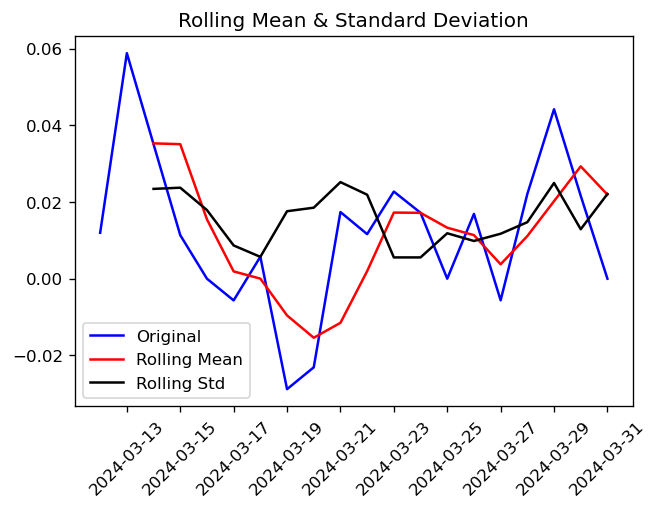

Results of Dickey-Fuller Test:
Test Statistic                -1.013715e+01
p-value                        8.609479e-18
#Lags Used                     8.000000e+00
Number of Observations Used    1.100000e+01
Critical Value (1%)           -4.223238e+00
Critical Value (5%)           -3.189369e+00
Critical Value (10%)          -2.729839e+00
dtype: float64
The time series is stationary.


/var/folders/x1/372sp1hn2fs8wfj7nl_xj3s80000gn/T/ipykernel_57898/2094820251.py:25: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if dfoutput[1] < 0.05:


In [22]:
df_sales_diff_2.dropna(inplace=True)
check_stationary(df_sales_diff_2)

## Decomposing

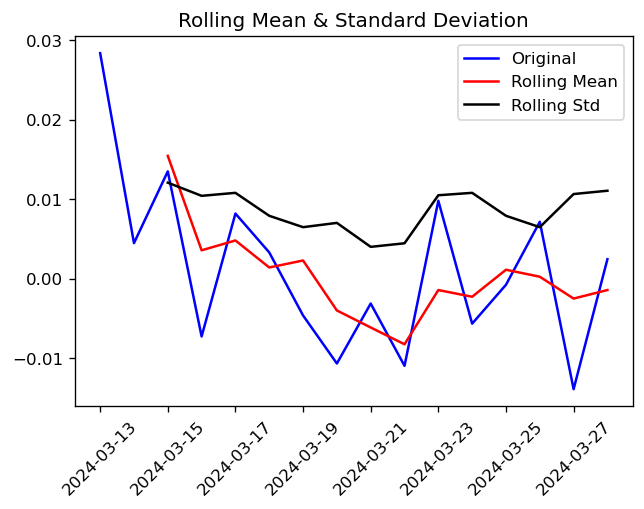

Results of Dickey-Fuller Test:
Test Statistic                -5.418915
p-value                        0.000003
#Lags Used                     6.000000
Number of Observations Used    9.000000
Critical Value (1%)           -4.473135
Critical Value (5%)           -3.289881
Critical Value (10%)          -2.772382
dtype: float64
The time series is stationary.


/var/folders/x1/372sp1hn2fs8wfj7nl_xj3s80000gn/T/ipykernel_57898/2094820251.py:25: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if dfoutput[1] < 0.05:


In [23]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(df_sales_log)
residual = decomposition.resid

df_sales_decompose = residual
df_sales_decompose.dropna(inplace=True)
check_stationary(df_sales_decompose)

# Time Series Forecasting with ARIMA

In [165]:
train = df_sales[:-int(len(df_sales)*0.3)]
test = df_sales[-int(len(df_sales)*0.3):]

In [167]:
from pmdarima import auto_arima
auto_arima(train, test='adf', seasonal=True, trace=True, error_action='ignore', suppress_warnings=True)

Performing stepwise search to minimize aic
 ARIMA(2,2,2)(0,0,0)[0]             : AIC=inf, Time=0.05 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=86.097, Time=0.00 sec
 ARIMA(1,2,0)(0,0,0)[0]             : AIC=80.183, Time=0.01 sec
 ARIMA(0,2,1)(0,0,0)[0]             : AIC=inf, Time=0.02 sec
 ARIMA(2,2,0)(0,0,0)[0]             : AIC=80.127, Time=0.01 sec
 ARIMA(3,2,0)(0,0,0)[0]             : AIC=82.114, Time=0.01 sec
 ARIMA(2,2,1)(0,0,0)[0]             : AIC=inf, Time=0.03 sec
 ARIMA(1,2,1)(0,0,0)[0]             : AIC=inf, Time=0.03 sec
 ARIMA(3,2,1)(0,0,0)[0]             : AIC=inf, Time=0.04 sec
 ARIMA(2,2,0)(0,0,0)[0] intercept   : AIC=82.070, Time=0.01 sec

Best model:  ARIMA(2,2,0)(0,0,0)[0]          
Total fit time: 0.212 seconds


ARIMA(order=(2, 2, 0), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

In [168]:
auto_arima(df_sales, test='adf', seasonal=True, trace=True, error_action='ignore', suppress_warnings=True)

Performing stepwise search to minimize aic
 ARIMA(2,2,2)(0,0,0)[0]             : AIC=inf, Time=0.04 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=120.533, Time=0.00 sec
 ARIMA(1,2,0)(0,0,0)[0]             : AIC=112.490, Time=0.00 sec
 ARIMA(0,2,1)(0,0,0)[0]             : AIC=inf, Time=0.01 sec
 ARIMA(2,2,0)(0,0,0)[0]             : AIC=111.495, Time=0.01 sec
 ARIMA(3,2,0)(0,0,0)[0]             : AIC=113.372, Time=0.01 sec
 ARIMA(2,2,1)(0,0,0)[0]             : AIC=inf, Time=0.03 sec
 ARIMA(1,2,1)(0,0,0)[0]             : AIC=inf, Time=0.02 sec
 ARIMA(3,2,1)(0,0,0)[0]             : AIC=inf, Time=0.03 sec
 ARIMA(2,2,0)(0,0,0)[0] intercept   : AIC=113.416, Time=0.01 sec

Best model:  ARIMA(2,2,0)(0,0,0)[0]          
Total fit time: 0.183 seconds


ARIMA(order=(2, 2, 0), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

In [170]:
from statsmodels.tsa.arima.model import ARIMA

p = 2
d = 2
q = 0

train.index = pd.DatetimeIndex(train.index.values, freq=train.index.inferred_freq)
model = ARIMA(train, order=(p,d,q)).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Sales   No. Observations:                   16
Model:                 ARIMA(2, 2, 0)   Log Likelihood                 -37.064
Date:                Mon, 22 Apr 2024   AIC                             80.127
Time:                        20:51:40   BIC                             82.045
Sample:                    03-10-2024   HQIC                            79.950
                         - 03-25-2024                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9733      0.420     -2.318      0.020      -1.796      -0.150
ar.L2         -0.4376      0.324     -1.349      0.177      -1.073       0.198
sigma2        10.8361      5.295      2.046      0.041       0.457      21.215
===================================================================================
Ljung-Box (L1) (Q):                   0.10   Jarque-Bera (JB):                 0.47
Prob(Q):                              0.76   Prob(JB):                         0.79
Heteroskedasticity (H):               0.61   Skew:                             0.26
Prob(H) (two-sided):                  0.60   Kurtosis:                         2.27
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [171]:
pred = model.predict(start=len(train), end=(len(df_sales)-1),dynamic=True)
pred

2024-03-26    179.169758
2024-03-27    179.397265
2024-03-28    180.905212
2024-03-29    181.579171
2024-03-30    182.504579
2024-03-31    183.550186
Freq: D, Name: predicted_mean, dtype: float64

In [172]:
test

,Sales
2024-03-26,179
2024-03-27,177
2024-03-28,183
2024-03-29,185
2024-03-30,187
2024-03-31,185


In [173]:
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(test, pred)
print("Mean Absolute Error (MAE):", mae)

mape= mean_absolute_percentage_error(test, pred)
print('MAPE: %f' %mape)

Mean Absolute Error (MAE): 2.3379791140426724
MAPE: 0.012718


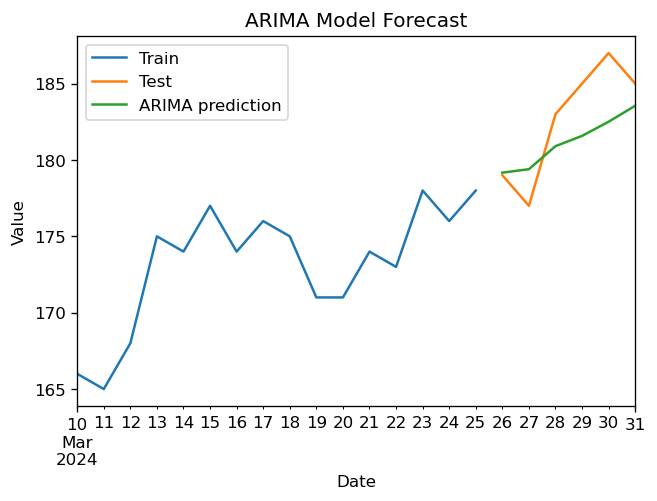

In [186]:
combined_data = pd.concat([train, test, pred], axis=1)
combined_data.columns = ['Train', 'Test', 'ARIMA prediction']

combined_data.plot(legend=True)

plt.xlabel('Date')
plt.ylabel('Value')
plt.title('ARIMA Model Forecast')

plt.show()

/Users/kietnguyen/miniconda3/envs/jupyter_run/lib/python3.11/site-packages/statsmodels/tsa/statespace/kalman_filter.py:2473: ValueWarning: Dynamic prediction specified to begin during out-of-sample forecasting period, and so has no effect.
  warn('Dynamic prediction specified to begin during'


<Axes: >

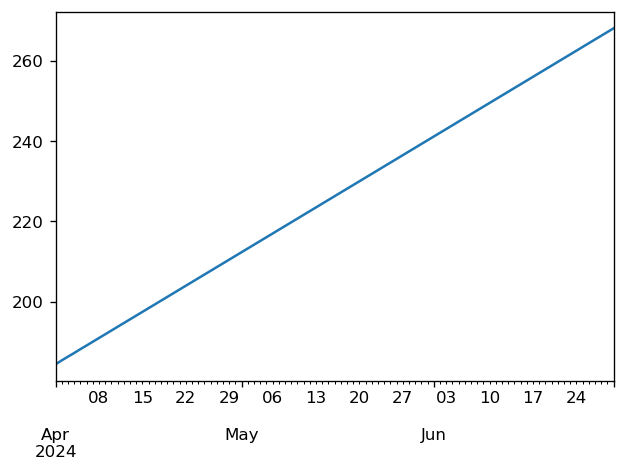

In [187]:
pred_future = model.predict(start=len(df_sales), end=(len(df_sales)+90),dynamic=True)
pred_future.plot()